# TODO: Title

This notebook lists all the steps that you need to complete the complete this project. You will need to complete all the TODOs in this notebook as well as in the README and the two python scripts included with the starter code.


**TODO**: Give a helpful introduction to what this notebook is for. Remember that comments, explanations and good documentation make your project informative and professional.

**Note:** This notebook has a bunch of code and markdown cells with TODOs that you have to complete. These are meant to be helpful guidelines for you to finish your project while meeting the requirements in the project rubrics. Feel free to change the order of these the TODO's and use more than one TODO code cell to do all your tasks.

In [28]:
!pip freeze > requirements.txt

In [1]:
# TODO: Install any packages that you might need
# For instance, you will need the smdebug package
!pip install smdebug

In [2]:
# TODO: Import any packages that you might need
# For instance you will need Boto3 and Sagemaker
import sagemaker
import boto3

sagemaker.config INFO - Not applying SDK defaults from location: /etc/xdg/sagemaker/config.yaml
sagemaker.config INFO - Not applying SDK defaults from location: /home/ec2-user/.config/sagemaker/config.yaml


## Dataset
TODO: Explain what dataset you are using for this project. Maybe even give a small overview of the classes, class distributions etc that can help anyone not familiar with the dataset get a better understand of it.

In [61]:
#TODO: Fetch and upload the data to AWS S3

# Command to download and unzip data
#!wget https://s3-us-west-1.amazonaws.com/udacity-aind/dog-project/dogImages.zip
#!unzip dogImages.zip
#!find dogImages/. -type f | wc -l
!ls dogImages/valid -l | wc -l
!find dogImages/train/. -type f | wc -l

134
6680


In [3]:
import sagemaker
from sagemaker.tuner import (
    IntegerParameter,
    CategoricalParameter,
    ContinuousParameter,
    HyperparameterTuner,
)

sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/cd0387-project-resnet-50"

role = sagemaker.get_execution_role()

In [5]:
# TODO: Upload the data to an S3 bucket. You can use the sagemaker_session object, boto3 or the AWS CLI
#inputs = sagemaker_session.upload_data(path="dogImages", bucket=bucket, key_prefix=prefix)
#print("input spec (in this case, just an S3 path): {}".format(inputs))

In [5]:
!pip install torchvision

In [5]:
import torchvision
import torch
from torchvision import datasets, models, transforms
import os

data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(256),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(256),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

data_dir = './dogImages'
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'valid']}
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid']}
class_names = image_datasets['train'].classes

In [6]:
print(class_names)

['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Cane_corso', '045.Cardigan_welsh_

In [7]:
print(dataset_sizes)
print(class_names)

{'train': 6680, 'valid': 835}
['001.Affenpinscher', '002.Afghan_hound', '003.Airedale_terrier', '004.Akita', '005.Alaskan_malamute', '006.American_eskimo_dog', '007.American_foxhound', '008.American_staffordshire_terrier', '009.American_water_spaniel', '010.Anatolian_shepherd_dog', '011.Australian_cattle_dog', '012.Australian_shepherd', '013.Australian_terrier', '014.Basenji', '015.Basset_hound', '016.Beagle', '017.Bearded_collie', '018.Beauceron', '019.Bedlington_terrier', '020.Belgian_malinois', '021.Belgian_sheepdog', '022.Belgian_tervuren', '023.Bernese_mountain_dog', '024.Bichon_frise', '025.Black_and_tan_coonhound', '026.Black_russian_terrier', '027.Bloodhound', '028.Bluetick_coonhound', '029.Border_collie', '030.Border_terrier', '031.Borzoi', '032.Boston_terrier', '033.Bouvier_des_flandres', '034.Boxer', '035.Boykin_spaniel', '036.Briard', '037.Brittany', '038.Brussels_griffon', '039.Bull_terrier', '040.Bulldog', '041.Bullmastiff', '042.Cairn_terrier', '043.Canaan_dog', '044.Can

In [8]:
print(image_datasets)
print(dataloaders)
print(len(class_names))

{'train': Dataset ImageFolder
    Number of datapoints: 6680
    Root location: ./dogImages/train
    StandardTransform
Transform: Compose(
               RandomResizedCrop(size=(256, 256), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           ), 'valid': Dataset ImageFolder
    Number of datapoints: 835
    Root location: ./dogImages/valid
    StandardTransform
Transform: Compose(
               Resize(size=256, interpolation=bilinear, max_size=None, antialias=True)
               CenterCrop(size=(256, 256))
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )}
{'train': <torch.utils.data.dataloader.DataLoader object at 0x7faba4cff040>, 'valid': <torch.utils.data.dataloader.DataLoader object at 0x7faba1383d60>}
133


Matplotlib is building the font cache; this may take a moment.


tensor([ 82, 121,  34,  20])


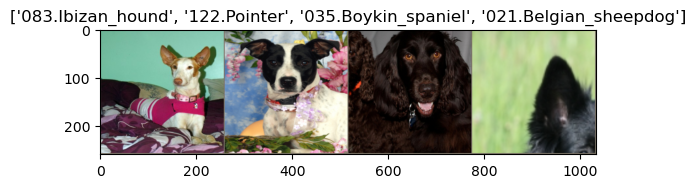

In [9]:
import numpy as np
import matplotlib.pyplot as plt

#show images
def imshow(inp, title=None):
    """Display image for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(classes)
# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow(out, title=[class_names[x] for x in classes])

## Hyperparameter Tuning
**TODO:** This is the part where you will finetune a pretrained model with hyperparameter tuning. Remember that you have to tune a minimum of two hyperparameters. However you are encouraged to tune more. You are also encouraged to explain why you chose to tune those particular hyperparameters and the ranges.

**Note:** You will need to use the `hpo.py` script to perform hyperparameter tuning.

In [23]:
from sagemaker.pytorch import PyTorch
from sagemaker.inputs import TrainingInput

In [13]:
#!pip install amazon-ai-s3-data-loader

ERROR: Could not find a version that satisfies the requirement amazon-ai-s3-data-loader (from versions: none)
ERROR: No matching distribution found for amazon-ai-s3-data-loader


In [32]:
#TODO: Declare your HP ranges, metrics etc.

hyperparameters = {
    #"gpu": True,
    "lr": ContinuousParameter(0.001, 0.1),
    "batch-size": CategoricalParameter([8, 16, 32, 64, 128]),
    "epochs": IntegerParameter(2, 10),
    #"model": "resnet50",
}

In [25]:
objective_metric_name = "average test loss"
objective_type = "Minimize"
metric_definitions = [{"Name": "average test loss", "Regex": "Test set: Average loss: ([0-9\\.]+)"}]

In [35]:
#TODO: Create estimators for your HPs
s3_data_path = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/'
s3_model_path = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/model'
s3_output_path = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output'

# TODO: Your estimator here
estimator = PyTorch(
    entry_point="hpo.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    output_path = s3_output_path,
)

tuner = HyperparameterTuner(
    estimator,
    objective_metric_name,
    hyperparameters,
    metric_definitions,
    max_jobs=2,
    max_parallel_jobs=2,
    objective_type=objective_type,
) #TODO: Create your HyperparameterTuner Object# TODO: Your HP tuner here

In [28]:
sagemaker_session = sagemaker.Session()

bucket = sagemaker_session.default_bucket()
prefix = "sagemaker/cd0387-project-resnet-50"

role = sagemaker.get_execution_role()

print(bucket)
print(prefix)

sagemaker-us-east-1-433073421675
sagemaker/cd0387-project-resnet-50


In [29]:
train_data_loc = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50'
#val_data_loc = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/valid'
#test_data_loc = 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/test'

channels = {
    'training': train_data_loc,
    #'validation': val_data_loc,
    #'test': test_data_loc
}

In [38]:
# TODO: Fit your HP Tuner
tuner.fit(inputs=channels, wait=True) 

No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config
No finished training job found associated with this estimator. Please make sure this estimator is only used for building workflow config


..................................................................................................................................................!


In [39]:
# TODO: Get the best estimators and the best HPs

best_estimator = tuner.best_estimator()

#Get the hyperparameters of the best trained model
best_estimator.hyperparameters()


2024-04-01 10:11:32 Starting - Preparing the instances for training
2024-04-01 10:11:32 Downloading - Downloading the training image
2024-04-01 10:11:32 Training - Training image download completed. Training in progress.
2024-04-01 10:11:32 Uploading - Uploading generated training model
2024-04-01 10:11:32 Completed - Resource released due to keep alive period expiry


{'_tuning_objective_metric': '"average test loss"',
 'batch-size': '"16"',
 'epochs': '3',
 'lr': '0.0010067149822831018',
 'sagemaker_container_log_level': '20',
 'sagemaker_estimator_class_name': '"PyTorch"',
 'sagemaker_estimator_module': '"sagemaker.pytorch.estimator"',
 'sagemaker_job_name': '"pytorch-training-2024-04-01-10-00-30-061"',
 'sagemaker_program': '"hpo.py"',
 'sagemaker_region': '"us-east-1"',
 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-433073421675/pytorch-training-2024-04-01-10-00-30-061/source/sourcedir.tar.gz"'}

## Model Profiling and Debugging
TODO: Using the best hyperparameters, create and finetune a new model

**Note:** You will need to use the `train_model.py` script to perform model profiling and debugging.

In [40]:
from sagemaker.debugger import Rule, rule_configs, ProfilerRule, DebuggerHookConfig, CollectionConfig, ProfilerConfig, FrameworkProfile
#from smdebug.trials import create_trial
#from smdebug.core.modes import ModeKeys

In [41]:
# TODO: Set up debugging and profiling rules and hooks
rules = [
    Rule.sagemaker(rule_configs.loss_not_decreasing()),
    ProfilerRule.sagemaker(rule_configs.LowGPUUtilization()),
    ProfilerRule.sagemaker(rule_configs.ProfilerReport()),
    Rule.sagemaker(rule_configs.vanishing_gradient()),
    Rule.sagemaker(rule_configs.overfit()),
    Rule.sagemaker(rule_configs.overtraining()),
    Rule.sagemaker(rule_configs.poor_weight_initialization()),
]

profiler_config = ProfilerConfig(
    system_monitor_interval_millis=500, framework_profile_params=FrameworkProfile(num_steps=5)
)
collection_config = [CollectionConfig(
    name="CrossEntropyLoss_output_0", 
    parameters={
        "include_regex": "CrossEntropyLoss_output_0",
        "train.save_interval": "5", 
        "eval.save_interval": "1"})]
    
debugger_config = DebuggerHookConfig(
    collection_configs=collection_config
)

Framework profiling will be deprecated from tensorflow 2.12 and pytorch 2.0 in sagemaker>=2.
See: https://sagemaker.readthedocs.io/en/stable/v2.html for details.


In [42]:
# TODO: Create and fit an estimator
#best_hyperparameters = {'batch_size': 256, 'epochs': 6, 'lr': 0.0012003609534198224 }
best_hyperparameters = {'batch_size': 256, 'epochs': 6, 'lr': 0.0010067149822831018 }


estimator = PyTorch(
    entry_point="train_model.py",
    role=role,
    py_version='py36',
    framework_version="1.8",
    instance_count=1,
    instance_type="ml.g4dn.xlarge",
    output_path = s3_output_path,
    hyperparameters = best_hyperparameters,
    profiler_config = profiler_config, 
    debugger_hook_config = debugger_config, 
    rules = rules 
)

In [ ]:
estimator.fit({'training': train_data_loc}, wait=True)

INFO:sagemaker.image_uris:image_uri is not presented, retrieving image_uri based on instance_type, framework etc.
INFO:sagemaker:Creating training-job with name: pytorch-training-2024-04-01-10-48-21-939


2024-04-01 10:48:22 Starting - Starting the training job...
2024-04-01 10:48:37 Starting - Preparing the instances for trainingLossNotDecreasing: InProgress
VanishingGradient: InProgress
Overfit: InProgress
Overtraining: InProgress
PoorWeightInitialization: InProgress
LowGPUUtilization: InProgress
ProfilerReport: InProgress
...
2024-04-01 10:49:16 Downloading - Downloading input data......
2024-04-01 10:50:17 Downloading - Downloading the training image...............
2024-04-01 10:52:54 Training - Training image download completed. Training in progress..bash: cannot set terminal process group (-1): Inappropriate ioctl for device
bash: no job control in this shell
2024-04-01 10:52:53,352 sagemaker-training-toolkit INFO     Imported framework sagemaker_pytorch_container.training
2024-04-01 10:52:53,386 sagemaker_pytorch_container.training INFO     Block until all host DNS lookups succeed.
2024-04-01 10:52:53,390 sagemaker_pytorch_container.training INFO     Invoking user training script

In [50]:
path = estimator.latest_job_debugger_artifacts_path()
print(path)

s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-01-10-48-21-939/debug-output


In [51]:
!pip install smdebug

In [52]:
import smdebug.trials as smd
from smdebug.core.modes import ModeKeys
import matplotlib.pyplot as plt

path = estimator.latest_job_debugger_artifacts_path()
#path = "s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/debug-output"
trial = smd.create_trial(path=path)
print(f"Saved these tensors: {trial.tensor_names()}")
#print(f"Loss values during evaluation were {trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.TRAIN)}")



[2024-04-01 11:35:21.230 ip-172-16-156-115.ec2.internal:6404 INFO s3_trial.py:42] Loading trial debug-output at path s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-01-10-48-21-939/debug-output
[2024-04-01 11:35:25.226 ip-172-16-156-115.ec2.internal:6404 INFO trial.py:197] Training has ended, will refresh one final time in 1 sec.
[2024-04-01 11:35:26.243 ip-172-16-156-115.ec2.internal:6404 INFO trial.py:210] Loaded all steps
Saved these tensors: ['CrossEntropyLoss_output_0', 'gradient/ResNet_fc.0.bias', 'gradient/ResNet_fc.0.weight', 'gradient/ResNet_fc.2.bias', 'gradient/ResNet_fc.2.weight', 'layer1.0.relu_input_0', 'layer1.0.relu_input_1', 'layer1.1.relu_input_0', 'layer1.1.relu_input_1', 'layer2.0.relu_input_0', 'layer2.0.relu_input_1', 'layer2.1.relu_input_0', 'layer2.1.relu_input_1', 'layer3.0.relu_input_0', 'layer3.0.relu_input_1', 'layer3.1.relu_input_0', 'layer3.1.relu_input_1', 'layer4.0.relu_input_0', 'layer4.0.relu_inp

**TODO**: Is there some anomalous behaviour in your debugging output? If so, what is the error and how will you fix it?  
**TODO**: If not, suppose there was an error. What would that error look like and how would you have fixed it?

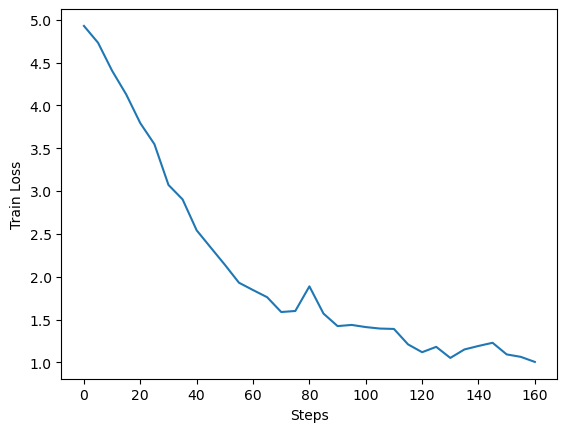

In [53]:
# TODO: Display the profiler output
plt.ylabel('Train Loss')
plt.xlabel('Steps')
plt.plot(trial.steps(mode=ModeKeys.TRAIN),list(trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.TRAIN).values()))
plt.show()

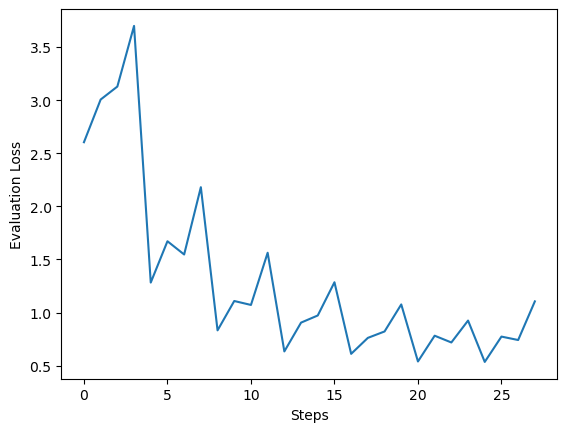

In [54]:
plt.ylabel('Evaluation Loss')
plt.xlabel('Steps')
plt.plot(trial.steps(mode=ModeKeys.EVAL),list(trial.tensor('CrossEntropyLoss_output_0').values(mode=ModeKeys.EVAL).values()))
plt.show()

In [55]:
import smdebug
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts

# Specify the training job name
training_job_name = estimator.latest_training_job.job_name
region = "us-east-1"
# Load the training job data
tj = TrainingJob(training_job_name, region)



ProfilerConfig:{'S3OutputPath': 's3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output', 'ProfilingIntervalInMilliseconds': 500, 'ProfilingParameters': {'DataloaderProfilingConfig': '{"StartStep": 0, "NumSteps": 5, "MetricsRegex": ".*", }', 'DetailedProfilingConfig': '{"StartStep": 0, "NumSteps": 5, }', 'FileOpenFailThreshold': '50', 'HorovodProfilingConfig': '{"StartStep": 0, "NumSteps": 5, }', 'LocalPath': '/opt/ml/output/profiler', 'PythonProfilingConfig': '{"StartStep": 0, "NumSteps": 5, "ProfilerName": "cprofile", "cProfileTimer": "total_time", }', 'RotateFileCloseIntervalInSeconds': '60', 'RotateMaxFileSizeInBytes': '10485760', 'SMDataParallelProfilingConfig': '{"StartStep": 0, "NumSteps": 5, }'}, 'DisableProfiler': False}
s3 path:s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-04-01-10-48-21-939/profiler-output


In [15]:
from smdebug.profiler.analysis.notebook_utils.training_job import TrainingJob
from smdebug.profiler.analysis.notebook_utils.timeline_charts import TimelineCharts
from smdebug.profiler.analysis.utils.profiler_data_to_pandas import PandasFrame


tj.wait_for_sys_profiling_data_to_be_available()


system_metrics_reader = tj.get_systems_metrics_reader()
system_metrics_reader.refresh_event_file_list()

# Get the system metrics data as a Pandas DataFrame
system_metrics_data = PandasFrame(system_metrics_reader)

# Plot the timeline of system metrics
plt.figure(figsize=(200, 1000))  # Adjust figure size as needed
for metric_name in system_metrics_data.columns:
    plt.plot(system_metrics_data.index, system_metrics_data[metric_name], label=metric_name)

plt.xlabel('Time')
plt.ylabel('Metric Value')
plt.title('System Metrics Timeline')
plt.legend()
plt.grid(True)
plt.show()



#view_timeline_charts = TimelineCharts(
#    system_metrics_reader,
#    framework_metrics_reader=None,
    #select_dimensions=["CPU", "GPU"],
    #select_events=["total"],
    #height=400,
#)

rule_output_path = "s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output"
print(f"You will find the profiler report in {rule_output_path}")



Profiler data from system is available


AttributeError: 'S3SystemMetricsReader' object has no attribute 'startswith'

In [16]:
rule_output_path = "s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output"
print(f"You will find the profiler report in {rule_output_path}")

! aws s3 ls {rule_output_path} --recursive

You will find the profiler report in s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output
2024-03-31 17:01:46     423983 sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-report.html
2024-03-31 17:01:46     280449 sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-report.ipynb
2024-03-31 17:01:41        575 sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-reports/BatchSize.json
2024-03-31 17:01:41      28172 sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
2024-03-31 17:01:41       2050 sagemaker/cd0387-project-resnet-50/output/pytorch-training-2

In [17]:
! aws s3 cp {rule_output_path} ./ --recursive

download: s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json to ProfilerReport/profiler-output/profiler-reports/CPUBottleneck.json
download: s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json to ProfilerReport/profiler-output/profiler-reports/LoadBalancing.json
download: s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json to ProfilerReport/profiler-output/profiler-reports/LowGPUUtilization.json
download: s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/rule-output/ProfilerR

In [19]:
import IPython

IPython.display.HTML(filename="ProfilerReport/profiler-output/profiler-report.html")

In [12]:
processing_job_arn = "arn:aws:sagemaker:us-east-1:433073421675:processing-job/pytorch-training-2024-03-3-ProfilerReport-78d1bbec"

setup_profiler_report(processing_job_arn)

## Model Deploying

In [20]:
#training_job_name = "pytorch-training-2024-03-31-16-43-47-880"
#training_job_description = sagemaker_session.sagemaker_client.describe_training_job(TrainingJobName=training_job_name)

# Extract relevant configuration parameters
#container_uri = training_job_description['AlgorithmSpecification']['TrainingImage']
#instance_type = training_job_description['ResourceConfig']['InstanceType']
#instance_count = training_job_description['ResourceConfig']['InstanceCount']
#hyperparameters = training_job_description['HyperParameters']

#print(container_uri)
#print(hyperparameters)
#estimator = sagemaker.estimator.Estimator(container_uri,
#                                          role=role,
#                                          instance_count=instance_count,
#                                          instance_type=instance_type,
#                                          hyperparameters=hyperparameters,
#                                          sagemaker_session=sagemaker_session)

763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8-gpu-py36
{'batch_size': '32', 'epochs': '8', 'lr': '0.0019174582302295044', 'sagemaker_container_log_level': '20', 'sagemaker_job_name': '"pytorch-training-2024-03-31-16-43-47-880"', 'sagemaker_program': '"train_model.py"', 'sagemaker_region': '"us-east-1"', 'sagemaker_submit_directory': '"s3://sagemaker-us-east-1-433073421675/pytorch-training-2024-03-31-16-43-47-880/source/sourcedir.tar.gz"'}


In [21]:
#estimator = sagemaker.model.Model(model_data="s3://sagemaker-us-east-1-433073421675/sagemaker/cd0387-project-resnet-50/output/pytorch-training-2024-03-31-16-43-47-880/output/model.tar.gz",
#                                   image_uri='763104351884.dkr.ecr.us-east-1.amazonaws.com/pytorch-training:1.8-gpu-py36',  # The URI of the Docker image containing your model
#                                   role=role,  # Your SageMaker execution role ARN
#                                   sagemaker_session=sagemaker_session)

In [ ]:
# TODO: Deploy your model to an endpoint

predictor=estimator.deploy(initial_instance_count=1, instance_type="ml.t2.medium") # TODO: Add your deployment configuration like instance type and number of instances

-----------------------------------------------

KeyboardInterrupt: 

In [ ]:
# TODO: Run an prediction on the endpoint

test_image_path = "./dogImages/test/101.Maltese/Maltese_06716.jpg"

with open(test_image_path, "rb") as f:
    payload = f.read()
    print("Display Image class 10:")
    display(Image.open(io.BytesIO(payload)))

response = predictor.predict(payload, initial_args={"ContentType": "image/jpeg"})
predicted_dog_breed = np.argmax(response, 1) + 1

print(f"Prediction: {predicted_dog_breed}")


image = # TODO: Your code to load and preprocess image to send to endpoint for prediction
response = predictor.predict(image)

In [ ]:
# TODO: Remember to shutdown/delete your endpoint once your work is done
predictor.delete_endpoint()